In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

from rasterio.mask import mask
from shapely.geometry import mapping

from acled_country_analysis import analysis

import pandas as pd

# Demographics of Lebanon

## Assignment

To overcome gaps in official demographic statistics, the team has turned to private sector data sources. The Data Lab used algorithmically generated data such as that released by [Meta](https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps). 

Additionally, the team also extracted the [Relative Wealth Index](https://dataforgood.facebook.com/dfg/tools/relative-wealth-index) data from Meta which helps identify differences in standard of living in the population. 

## Data

### High Resolution Population Density

In partnership with the Center for International Earth Science Information Network (CIESIN) at Columbia University, Meta uses state-of-the-art computer vision techniques to identify buildings from publicly accessible mapping services to create these population datasets. These maps are available at 30-meter resolution. These maps aren’t built using Facebook data and instead rely on applying machine vision AI to satellite imagery and census information. This data is publicly accessible on their [AWS Server](https://registry.opendata.aws/dataforgood-fb-hrsl/) and detailed documentation can be found [here](https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps). 

The Population Data is demographically disaggregated into the following categories
* Men
* Women
* Children under 5
* Elderly
* Women of Reproductive Age (15-49)
* Youth (15-24)
* Senior

#### Accessing the Data

The High Resolution Population Density Layer can be accessed through two ways - either through Meta's [AWS Server](https://registry.opendata.aws/dataforgood-fb-hrsl/) or through [HdX](https://data.humdata.org/dataset/lebanon-high-resolution-population-density-maps-demographic-estimates). Both the links will provide additional instructions on how to access the data. Shapefiles are also obtained from [HdX website](https://data.humdata.org/dataset/cod-ab-lbn?).

### Relative Wealth Index

The Meta Relative Wealth Index predicts the relative standard of living within countries using privacy protecting connectivity data, satellite imagery, and other novel data sources. To calculate this index, Meta uses measurements of household wealth collected through *face-to-face surveys conducted by the United States Agency for International Development* with 1,457,315 unique households living in 66,819 villages in 56 different LMICs around the world. Following this, they use spatial markers to link villages to non-traditional data sources , including satellite imagery, cellular network data, topographic maps, and *privacy protecting connectivity data from Facebook*. They process the non-traditional data using deep learning and other computational algorithms, which convert the raw data to a set of quantitative features for each village. They use these features to train a supervised machine learning model that predicts the relative wealth of each populated 2.4km2 grid cell on the planet, even in regions where no ground truth data exists (Chi et. al., 2022).

The Relative Wealth Index is a number that compared the wealth within the country where negative RWI implies poorer areas and positive RWI implies richer areas. 

#### Accessing the Data

Relative Wealth Index dataset has been obtained through the Development Data Partnership. This raw data has been made accessible via [SharePoint](https://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FData%20Lab%2FLebanon%20Economic%20Analytics%2FData%2Frelative%5Fwealth&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5).

## Methodology and Implementation

The data extracted from Meta was then aggregated to different admin levels using the shapefiles available on [HdX](https://data.humdata.org/dataset/cod-ab-lbn?). These datasets are made available on [SharePoint](https://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FData%20Lab%2FLebanon%20Economic%20Analytics%2FData%2Fpopulation%2Fmeta%2Dhigh%2Dresolution%2Dpopulation%2Ddensity%2F2023&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5). Relative Wealth Index is accessible to the project team via the Development Data Partnership. 

In [2]:
LEBANON_ADM3 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm3_cdr_20200810.shp')
LEBANON_ADM4 = gpd.read_file('../../data/shapefiles/lbn_beirut_adm4_mapaction_pcoded/lbn_beirut_adm4_MapAction_Pcoded.shp')
LEBANON_ADM0 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm0_cdr_20200810.shp')

In [3]:
LEBANON_ADM1 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm1_cdr_20200810.shp')
LEBANON_ADM2 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm2_cdr_20200810.shp')

Use the below method to clip HRSL data for Lebanon if the data is obtained from the AWS server. If it is directly downloaded from HdX, just reading the file should suffice

In [6]:
hrsl = pd.read_csv('../../data/population/2023/population_lat_30_lon_30.csv')
lebanon_bbox = (35.1260526873, 33.0890400254, 36.6117501157, 34.6449140488)
hrsl = hrsl[(hrsl['longitude']>35.1260526873)&(hrsl['longitude']<36.6117501157)&(hrsl['latitude']>33.0890400254)&(hrsl['latitude']<34.6449140488)]

In [16]:
hrsl = analysis.convert_to_gdf(hrsl)

In [ ]:
# aggregate HRSL to admin level 1 and 2
hrsl_lebanon0 = LEBANON_ADM0.sjoin(hrsl)
hrsl_lebanon1 = LEBANON_ADM1.sjoin(hrsl)

In [28]:
hrsl_lebanon0 = LEBANON_ADM0.sjoin(hrsl)
hrsl_lebanon0 = hrsl_lebanon0.groupby(['admin0Name']).sum()

hrsl_lebanon3 = LEBANON_ADM3.sjoin(hrsl)

In [33]:
hrsl_lebanon3 = hrsl_lebanon3.groupby(['admin0Name', 'admin1Name', 'admin2Name','admin3Name']).sum().reset_index()[['admin0Name', 'admin1Name', 'admin3Name', 'population']]
hrsl_lebanon3 = hrsl_lebanon3.merge(LEBANON_ADM3[['admin0Name', 'admin1Name', 'admin3Name', 'geometry']], on = ['admin0Name', 'admin1Name', 'admin3Name'])

hrsl_lebanon3 = gpd.GeoDataFrame(hrsl_lebanon3, crs="EPSG:4326", geometry='geometry')

In [89]:
import matplotlib.pyplot as plt
import matplotlib

# Set the default font family
matplotlib.rcParams['font.family'] = 'Georgia'  # Change 'serif' to your desired font family


Text(-0.25, -0.05, "Source: Population estimates from Meta's HRSL aggregated to admin regions from HdX")

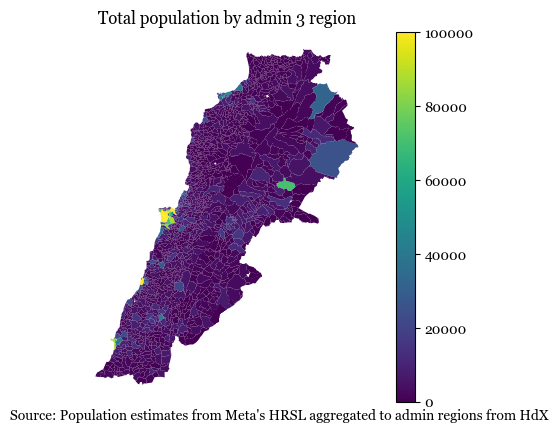

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axis('off')
hrsl_lebanon3.plot(column='population', cmap='viridis',vmax = 100000, legend = True, ax=ax)
plt.title('Total population by admin 3 region', fontsize=12, ha='center')

subtitle_text = "Source: Population estimates from Meta's HRSL aggregated to admin regions from HdX"
ax.text(-0.25, -0.05, subtitle_text, transform=ax.transAxes, fontsize=10, ha='left')

### Findings

* The area around Beirut is substantially more populated than the rest of the country. 
* The areas sharing a border with Syria also have a higher population.

In [72]:
rw = pd.read_csv('../../data/LBN_relative_wealth_index.csv')
rw = analysis.convert_to_gdf(rw)

Text(-0.25, -0.05, 'Source: Meta')

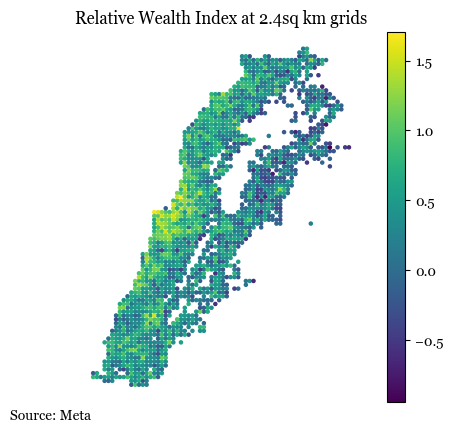

In [112]:
fig, ax = plt.subplots()
plt.axis('off')
rw.plot(column = 'rwi', legend = True, ax=ax, markersize=5)

plt.title('Relative Wealth Index at 2.4sq km grids', fontsize=12, ha='center')

subtitle_text = "Source: Meta"
ax.text(-0.25, -0.05, subtitle_text, transform=ax.transAxes, fontsize=10, ha='left')

### Findings

* The northern border shared with Syria includes some of the poorest regions in the country
* The area around Beirut is the wealthiest in the country

## Limitations

The Meta datasets are using deep learning algorithms on existing data/last avalable data, especially for the population numbers. Given the underlying numbers are likely outdated, the confidence level of the population figures is uncertain. 

## References

Chi, Guanghua, Han Fang, Sourav Chatterjee, and Joshua E. Blumenstock. "Microestimates of wealth for all low-and middle-income countries." Proceedings of the National Academy of Sciences 119, no. 3 (2022): e2113658119.